**Name : Niket Ralebhat** \
**Section : Cse 2** \
**Scholar Number : 211112268**  

# Logistic Regression

In [122]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import math

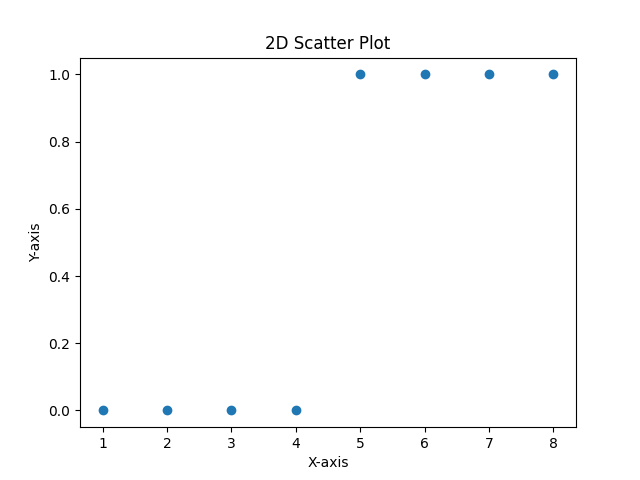

In [123]:
x_train = np.array([1,2,3,4,5,6,7,8])
y_train = np.array([0, 0, 0,0,1, 1, 1, 1]) 

plt.figure()
plt.scatter(x_train, y_train)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Scatter Plot')

plt.show()

In [124]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

def compute_cost_logistic(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = x[i]*w + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [125]:
def compute_gradient_logistic(X, y, w, b): 

    m = X.shape[0]
    dj_dw = 0                          
    dj_db = 0

    for i in range(m):
        f_wb_i = sigmoid(X[i]*w + b)     
        err_i  = f_wb_i  - y[i]               
        
        dj_dw = dj_dw + err_i * X[i]    
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                              
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw  

In [126]:
w_tmp = 0
b_tmp = 0
print(compute_cost_logistic(x_train, y_train, w_tmp, b_tmp))
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(x_train, y_train, w_tmp, b_tmp)
print(dj_dw_tmp)
print(dj_db_tmp)

0.6931471805599453
-1.0
0.0


In [127]:
def gradient_descent_logistic(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = w_in 
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<100000:  
            J_history.append( compute_cost_logistic(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history     


In [128]:
w_tmp  = 0.
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_logistic(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6244697094778588   


Iteration 1000: Cost 0.1511678101646521   
Iteration 2000: Cost 0.11033837506696467   
Iteration 3000: Cost 0.09148867162546706   
Iteration 4000: Cost 0.07975076140225791   
Iteration 5000: Cost 0.07141459573428217   
Iteration 6000: Cost 0.06504134914558996   
Iteration 7000: Cost 0.059934686572696017   
Iteration 8000: Cost 0.055708311711335085   
Iteration 9000: Cost 0.052126954928260874   

updated parameters: w:3.1770228834435104, b:-14.156508824137587


C:\Users\Niket Ralebhat\AppData\Local\Temp\ipykernel_22364\4213473962.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train, y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)


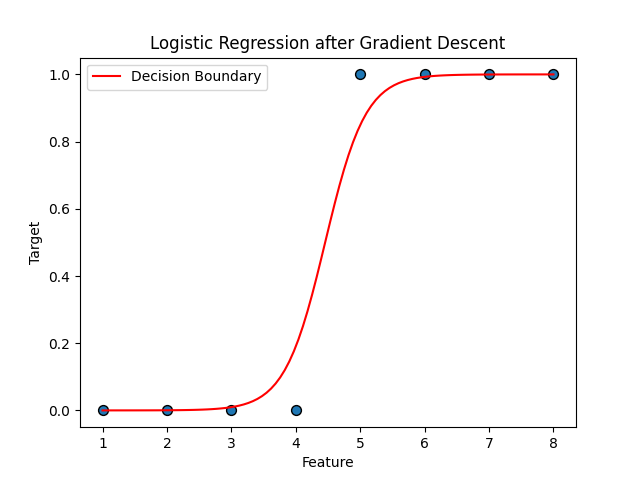

In [129]:
plt.figure()
plt.scatter(x_train, y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

# Plot the decision boundary
x_values = np.linspace(min(x_train), max(x_train), 100)
y_values = sigmoid(b_out + w_out * x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Logistic Regression after Gradient Descent')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
x_values = x_train
predictions = sigmoid(b_out + w_out * x_values)
threshold = 0.5
predictions = (predictions >= threshold).astype(int)
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)
conf_matrix = confusion_matrix(y_train, predictions)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[4 0]
 [0 4]]


# Linear Regression

In [131]:
def gradient_descent_linear(x, y, w_in, b_in, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_linear(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_linear(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(num_iters/10) == 0:
        #     print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
        #           f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
        #           f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b #return w and J,w history for graphing

def compute_gradient_linear(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


def compute_cost_linear(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


updated parameters: w:3.1770228834435104, b:-14.156508824137587


C:\Users\Niket Ralebhat\AppData\Local\Temp\ipykernel_22364\324613428.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train, y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)


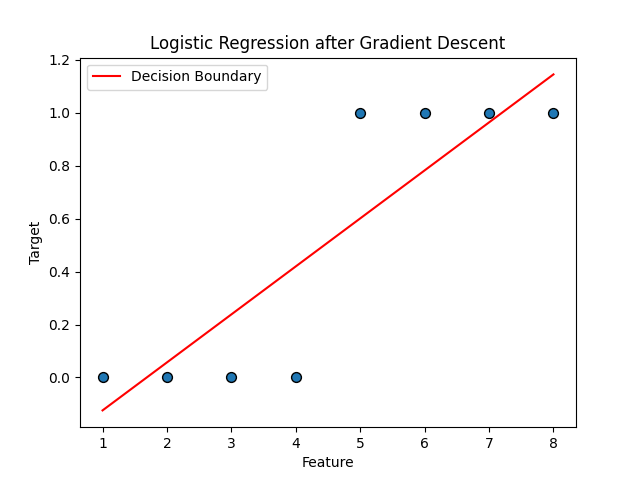

In [132]:
w_tmp_linear = 0.
b_tmp_linear  = 0.
alph = 0.01
iters = 1000

w_out_linear, b_out_linear = gradient_descent_linear(x_train, y_train, w_tmp_linear, b_tmp_linear, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

plt.figure()
plt.scatter(x_train, y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

# Plot the decision boundary
x_values = np.linspace(min(x_train), max(x_train), 100)
y_values = (b_out_linear + w_out_linear * x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Logistic Regression after Gradient Descent')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
x_values = x_train
predictions =  (b_out_linear + w_out_linear * x_values)
threshold = 0.5
predictions = (predictions >= threshold).astype(int)
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)
conf_matrix = confusion_matrix(y_train, predictions)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[4 0]
 [0 4]]
